# Scientific Programming

"Scientific Programming" isn't quite a [programming language paradigm](https://en.wikipedia.org/wiki/Programming_paradigm), but [scientific programming languages](https://en.wikipedia.org/wiki/Scientific_programming_language) as tend to include tools or features that are useful during research in many technical fields. This can include **linear algebra**, **statistical functions** and **distributions**, and **numerical optimization**. Answering research questions often involves testing the same approaches across a wide variety of hyperparameters, so ideally a "*scientific programming environment*" will also support breaking code into logical units and executing in a distributed environment.

## [Numpy](https://numpy.org)

> "*The fundamental package for scientific computing with Python.*"

This isn't hyperbole. Every Python package for scientific computing uses `numpy` in some way.

In [1]:
import numpy as np

### Data Structures: The Numpy Array

A 1-dimensional array is often called a *vector*

In [2]:
np.array([0, 1, 2, 3, 4])

array([0, 1, 2, 3, 4])

A 2-dimensional array is often called a *matrix*

In [3]:
np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

3-dimensional and higher arrays are often called [*tensors*](https://en.wikipedia.org/wiki/Tensor). 

> Longer explanation: "Tensors" are quite general and therefore can be defined multiple ways. We'll stick with the "*tensor is a generalization of a matrix*" definition, but know that other definitions exist.

These show up in domains like computer vision and computer graphics, where an *image* may be represented as a 3-dimensional array with channels for Red, Green, and Blue (RGB).

In [4]:
np.arange(12).reshape(3, 2, 2)

array([[[ 0,  1],
        [ 2,  3]],

       [[ 4,  5],
        [ 6,  7]],

       [[ 8,  9],
        [10, 11]]])

In [5]:
np.arange(9).reshape(3, 3)

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

### Interjection! [matplotlib](https://matplotlib.org/cheatsheets/), plotting, and visualization

A key part of any analysis is an *explanatory* or *visualization* step.

In [6]:
import matplotlib.pyplot as plt

Given a matrix of numbers, we can inspect the values they contain:

In [7]:
np.arange(100).reshape(10, 10)

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

But we could also represent this matrix by visualizing the data it contains.

Imagine mapping each value $0-100$ to a color, where $0$ is darker and $100$ is brighter. The matrix is an image, or:

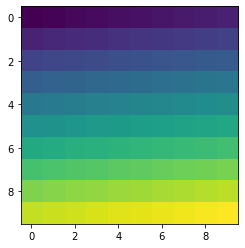

In [8]:
plt.imshow(np.arange(100).reshape(10, 10))

## `numpy` Distributions, Statistical Functions, and Sampling

When summarizing data, we frequently want to make an analogy to a statistical model that may have generated the data. Or we may want to summarize properties of a population (mean, median, quartiles).

We can access random number generators by initializing a `default_rng`:

> **Note**: Here we initialize `default_rng` with parameter `42`. This pattern, called "seeding" a random number generator, acts as a start state for generation and allows us to *exactly* reproduce the random states in subsequent computations.

In [9]:
from numpy.random import default_rng

rng = default_rng(42)

In [10]:
rng.random()

0.7739560485559633

In [11]:
uniform_integers = rng.integers(2, size=100).reshape(10, 10)

uniform_integers

array([[1, 0, 0, 1, 0, 1, 0, 0, 1, 1],
       [1, 1, 1, 1, 1, 0, 1, 0, 1, 0],
       [0, 1, 1, 1, 0, 1, 1, 0, 0, 0],
       [0, 1, 1, 0, 1, 1, 0, 1, 0, 1],
       [1, 0, 0, 1, 0, 1, 1, 1, 1, 0],
       [0, 0, 0, 0, 1, 0, 1, 1, 1, 1],
       [0, 1, 0, 0, 1, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0, 0, 1, 1, 0, 1],
       [1, 0, 1, 0, 0, 1, 1, 0, 1, 0]])

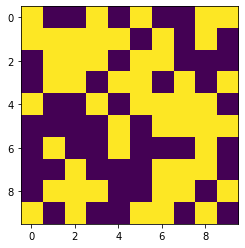

In [12]:
plt.imshow(uniform_integers)

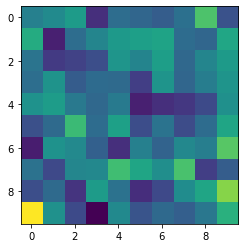

In [13]:
standard_normal_100 = rng.standard_normal(100)

plt.imshow(standard_normal_100.reshape(10, 10))

In [14]:
np.mean(standard_normal_100)

-0.12238430611282411

In [15]:
np.std(standard_normal_100)

0.8868149827316432

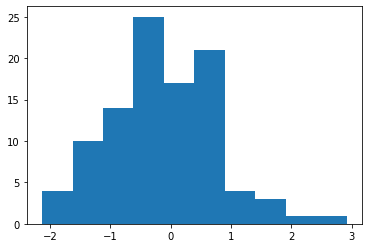

In [16]:
_, _, _ = plt.hist(standard_normal_100)

In [17]:
sn_100_000 = rng.standard_normal(100_000)

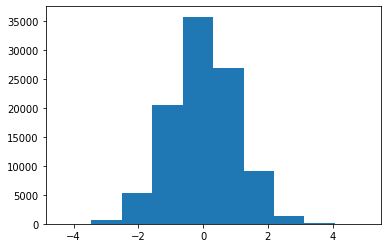

In [18]:
_, _, _ = plt.hist(sn_100_000)

In [19]:
sample_mean = np.mean(sn_100_000)

sample_mean

-0.004162673084355431

In [20]:
sample_std = np.std(sn_100_000)

sample_std

1.0040505552858285

In statistics and machine learning, we often phrase our problems in terms of optimizing against some metric representing *what we care about*.

Here, we might quantify our performance in terms of "*how far the predicted mean/deviation is from the true value used to generate the data*".

$$\textrm{Absolute Error} = | y_{\textrm{true}} - y_{\textrm{pred}} |$$

In [21]:
def absolute_error(true_value, predicted_value):
    return np.abs(true_value - predicted_value)

Compute the absolute error between the known mean and standard deviation $(0.0, 1.0)$ and the sample mean and sample standard deviation:

In [22]:
absolute_error(0.0, np.mean(standard_normal_100))

0.12238430611282411

In [23]:
absolute_error(1.0, np.std(standard_normal_100))

0.11318501726835684

As we observe more examples (with some assumptions on our samples being independent and identically distributed / i.i.d. from one another), we expect our sample mean to converge to the true mean&mdash;or that the error approaches $0.0$ as we observe more data:

In [24]:
absolute_error(0.0, sample_mean)

0.004162673084355431

In [25]:
absolute_error(1.0, sample_std)

0.004050555285828539

## Regression Models and Fitting Parameters

When we assume that our outcome $y$ is linear (described as a sum of products of our variables $x_{i}$ and possibly unknown parameters $\theta_{i}$). Then we can minimize the error of our residuals with

$$\theta = (\mathbf{X}^{\top} \mathbf{X})^{-1} \mathbf{X}^{\top} y$$

In [26]:
class LinearModel:
    
    def __init__(self):
        self.parameters = None
    
    def fit(self, X, y):
        X = np.hstack([np.ones(X.shape), X])
        self.parameters = np.linalg.inv(X.T @ X) @ (X.T @ y)
    
    def predict(self, X):
        X = np.hstack([np.ones(X.shape), X])
        return X @ self.parameters

Imagine we have a 2D dataset where we assume values on the y-axis has some relationship to the values on the X-axis.

> **Note**: Try exploring the next few steps with different data sets. Alexander has a tool on his blog to help create datasets: https://hayesall.com/blog/draw-demo-ml-datasets/)

In [27]:
X = np.array([-0.956,-0.868,-0.824,-0.671,-0.592,-0.479,-0.359,-0.283,-0.207,-0.128,-0.0315,0.0405,0.176,-0.952,0.201,0.229,0.321,0.461,0.500,0.621,0.717,0.776,0.876,0.928,0.981,0.605,0.117]).reshape(-1, 1)
y = np.array([-0.829,-0.865,-0.609,-0.681,-0.421,-0.469,-0.325,-0.0611,-0.0971,-0.0411,-0.121,0.119,0.0549,-0.941,0.279,0.171,0.363,0.479,0.415,0.603,0.575,0.775,0.827,0.991,0.935,0.471,0.139]).reshape(-1, 1)

Notice that the lower-left point is near $(-1, -1)$, the top-right point is near $(1, 1)$, and the points appear to pass through the origin at $(0, 0)$.

We'd expect the parameters of a line explaining this (typically written as $y = mx + b$, but in this case: $y = \theta_{1} x + \theta_{0}$) to have a slope $m = 1.0$ and an intercept $b = 0.0$.

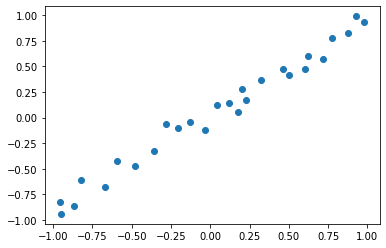

In [28]:
plt.scatter(X, y)

In [29]:
lm = LinearModel()
lm.fit(X, y)

lm.parameters

array([[0.02358419],
       [0.91728689]])

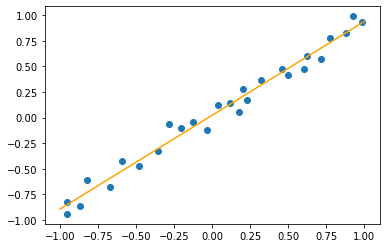

In [30]:
X_new = np.linspace(-1, 1, 10).reshape(-1, 1)
y_pred = lm.predict(X_new)

fig, ax = plt.subplots(1, 1)

ax.scatter(X, y)
ax.plot(X_new, y_pred, c='orange')

## [Pandas](https://pandas.pydata.org/)

> **pandas** is a fast, powerful, flexible and easy to use open source data analysis
> and manipulation tool, built on top of the Python programming language.

In [31]:
import pandas as pd

## Data Structures: The Series and the DataFrame

We saw 1- and 2-dimensional arrays when working with `numpy`. During analysis, it's useful to give names to these entities.

A "series" is a column of numbers:

In [32]:
height_series = pd.Series([5, 10, 15])

height_series

0     5
1    10
2    15
dtype: int64

Putting multiple series next to each other provides a `DataFrame`.

This is analogous to a *Spreadsheet* where each row is an object, and the value in each column is an attribute of that object.

As an example, we'll initialize a DataFrame where each row represents a shape with a "Height" and "Width":

In [33]:
shape_frame = pd.DataFrame(
  {
      "Height": [5, 10, 15],
      "Width": [5, 5, 5],
  }
)

shape_frame

,Height,Width
0,5,5
1,10,5
2,15,5


If "Height" and "Width" are the only parameters for these shapes, then each of them have to be either a *square* or a *rectangle*. Let's write a function for deciding which:

In [34]:
def is_square_or_rectangle(h, w):
    if w == h:
        return "square"
    return "rectangle"

... and apply this function to each row of the table.

In [35]:
shapes = []

for _, row in shape_frame.iterrows():
    shapes.append(is_square_or_rectangle(row.Height, row.Width))

shapes

['square', 'rectangle', 'rectangle']

Now we'll assign a column `"Shapes"` in our `shape_frame` to the list of values we just computed:

In [36]:
shape_frame["Shapes"] = shapes

shape_frame

,Height,Width,Shapes
0,5,5,square
1,10,5,rectangle
2,15,5,rectangle


In [37]:
data = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",
    header=None,
)
data.columns = [
    "Age", "WorkClass", "fnlwgt", "Education", "EducationNum",
    "MaritalStatus", "Occupation", "Relationship", "Race", "Gender",
    "CapitalGain", "CapitalLoss", "HoursPerWeek", "NativeCountry", "Income"
]

data

,Age,WorkClass,fnlwgt,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Gender,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [38]:
data_continuous = data[["Age", "EducationNum", "CapitalGain", "HoursPerWeek"]]

data_continuous

,Age,EducationNum,CapitalGain,HoursPerWeek
0,39,13,2174,40
1,50,13,0,13
2,38,9,0,40
3,53,7,0,40
4,28,13,0,40
...,...,...,...,...
32556,27,12,0,38
32557,40,9,0,40
32558,58,9,0,40
32559,22,9,0,20


## [seaborn](https://seaborn.pydata.org/)

> "A Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics."

`matplotlib` has several interfaces with varying degrees of complexity for creating visualizations. *Statistical visualizations* are often defined as a narrow range of visualizations that help visualize trends in data.

`seaborn` is a high-level library built on top of matplotlib with functions for creating common statistical plots.

> **Also See**: The [seaborn example gallery](https://seaborn.pydata.org/examples/index.html)

In [39]:
import seaborn as sns

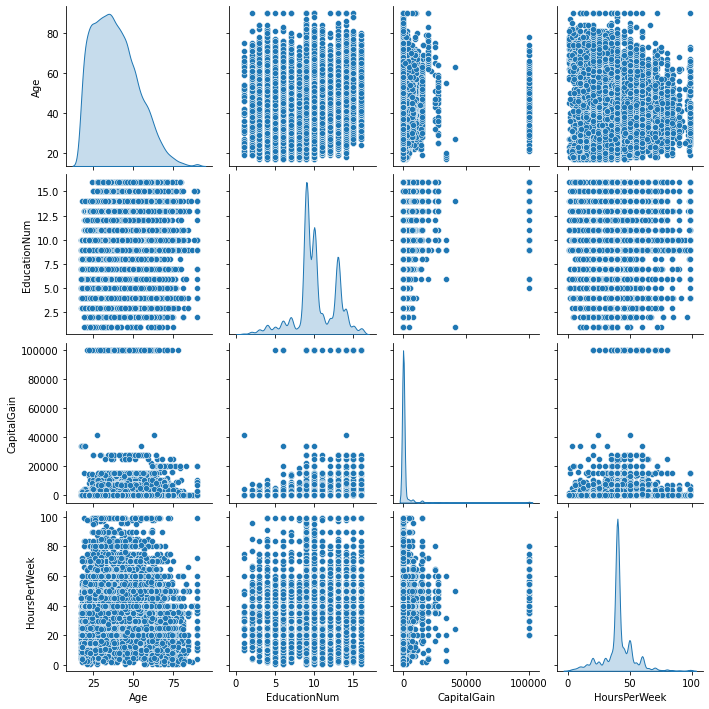

In [40]:
sns.pairplot(data_continuous, diag_kind="kde")